# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt> in cell 2 of this notebook?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

In [7]:
import sys
!{sys.executable} -m pip install qmsolve

import numpy as np
import matplotlib.pyplot as plt

import time 
time.sleep(2)

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV



Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


'\nProblem#1: The Hamiltonian Operator is an Operator that represents the total energy\nkinetic and potential energy. It can tell us how much energy a particle has, how \nit will evolve over time, and what its allowed energy levels are.\nhttps://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)\nhttp://hyperphysics.phy-astr.gsu.edu/hbase/quantum/Scheq.html#c4\n'

Computing...
Took 0.026328325271606445
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


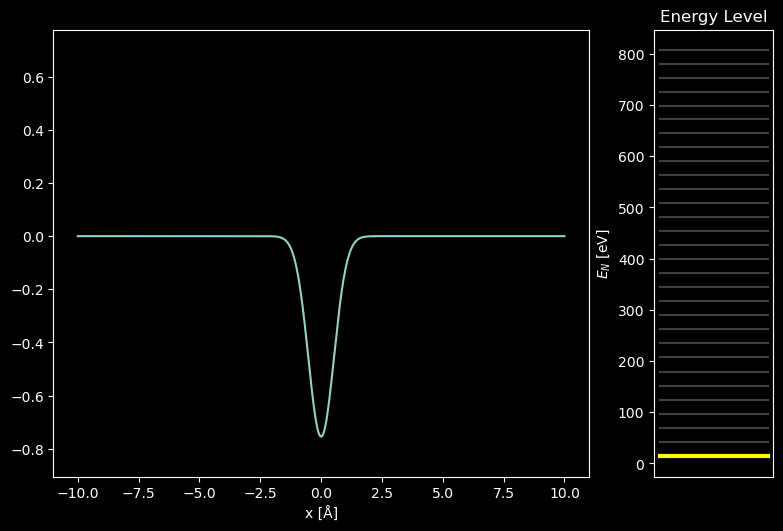

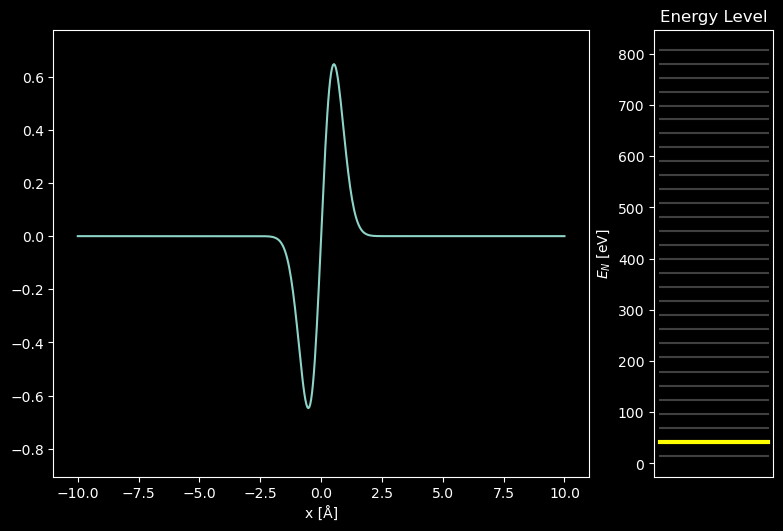

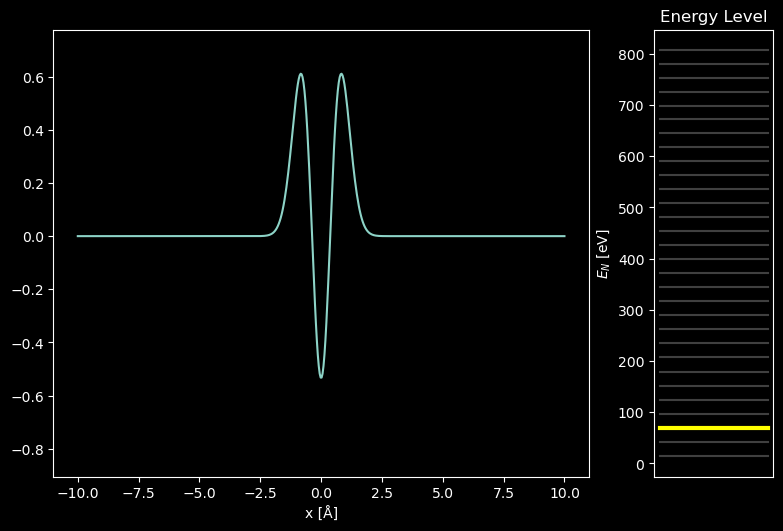

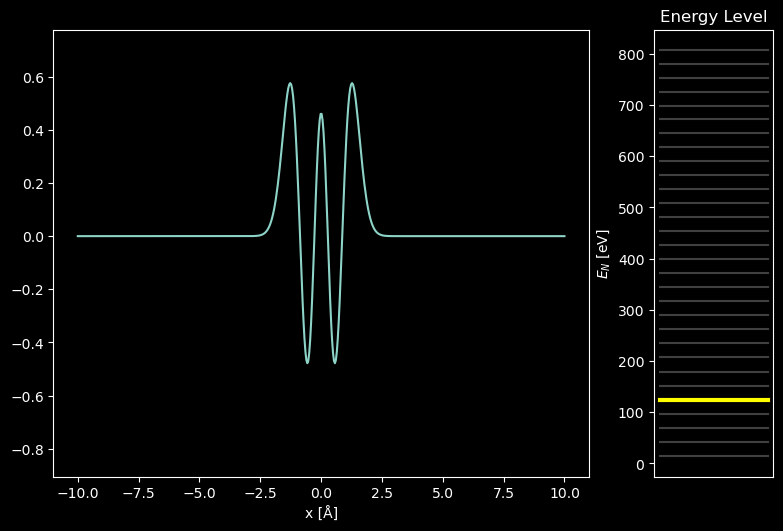

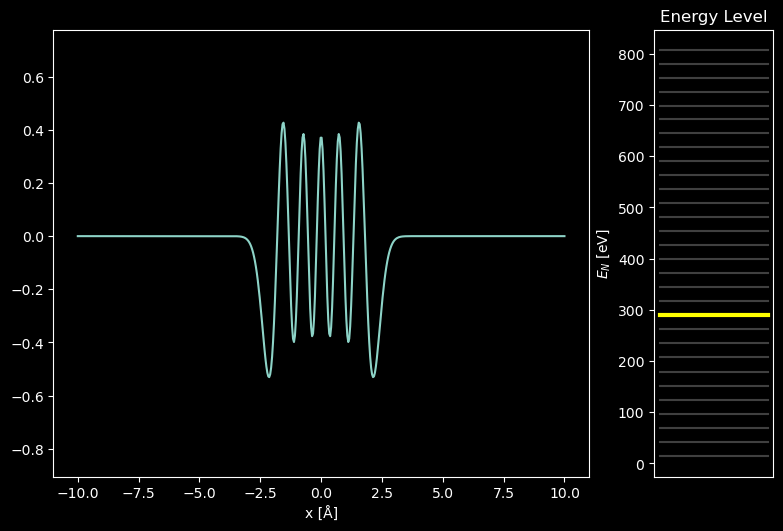

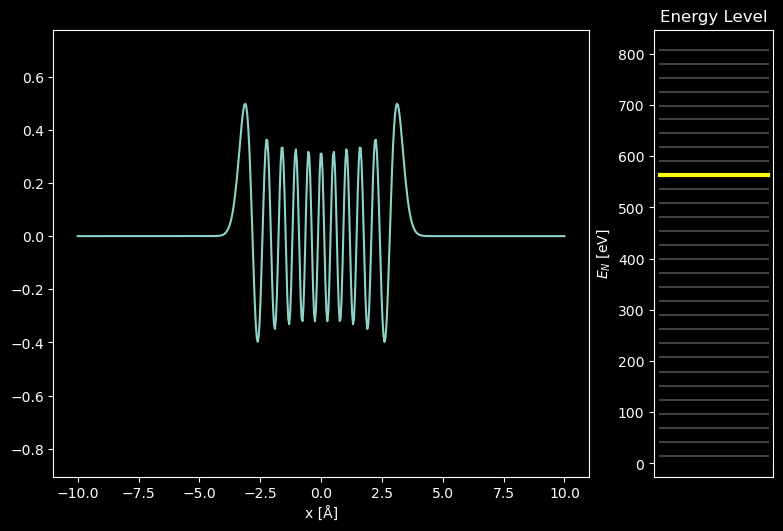

In [9]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(10)
visualization.plot_eigenstate(20)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Problem#1: The Hamiltonian Operator is an Operator that represents the total energy
kinetic and potential energy. It can tell us how much energy a particle has, how 
it will evolve over time, and what its allowed energy levels are.
https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)
http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/Scheq.html#c4

Problem#2: Hooks law is the force law in the harmonic_ocillator() function F(x)=-kx

Problem#5: The x axis of the plot is the position in units of angstroms [Å]

Problem#6: We are plotting the funtion Psi(x) or the wave function not the probability. If we were plotting the probability the wave wouldnt go up and down mutiple times. In the plots above we can see the wave travels up and down multiple times depending on the eigenstate. 

Computing...
Took 0.026417255401611328
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


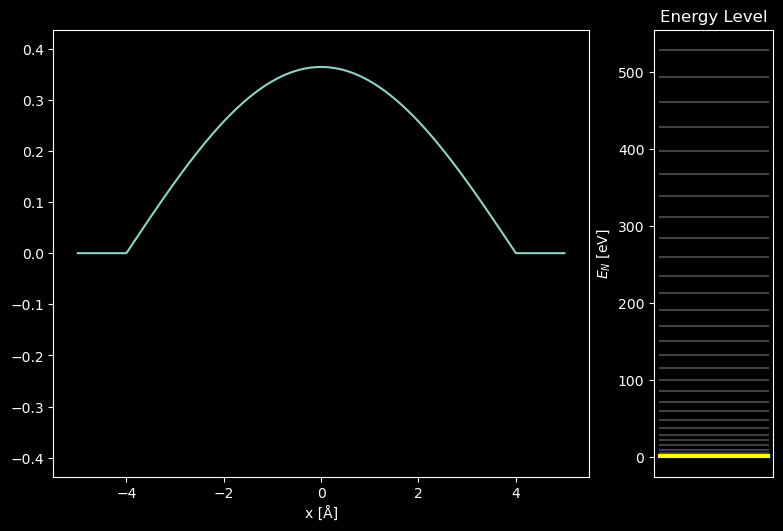

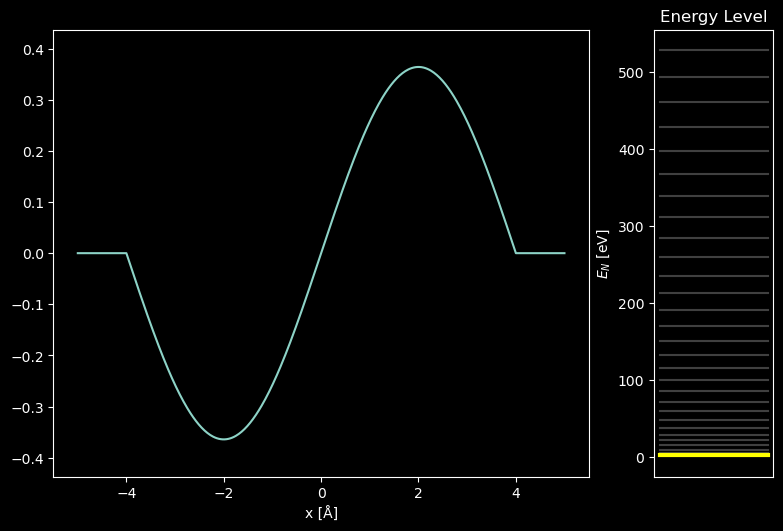

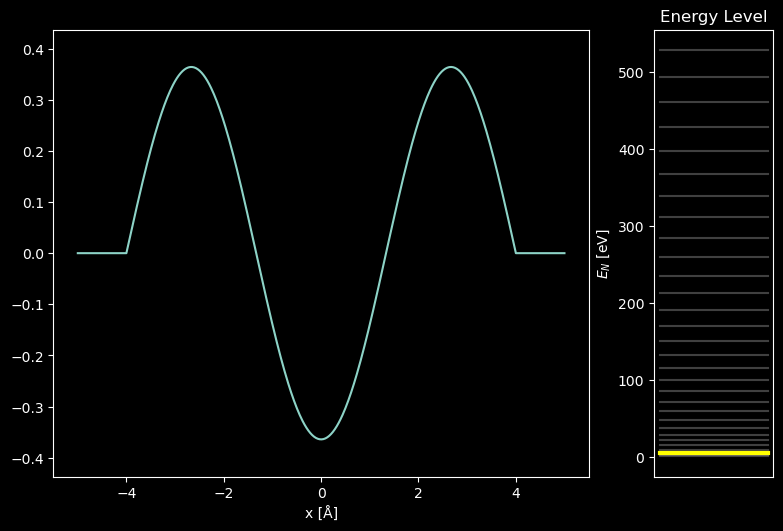

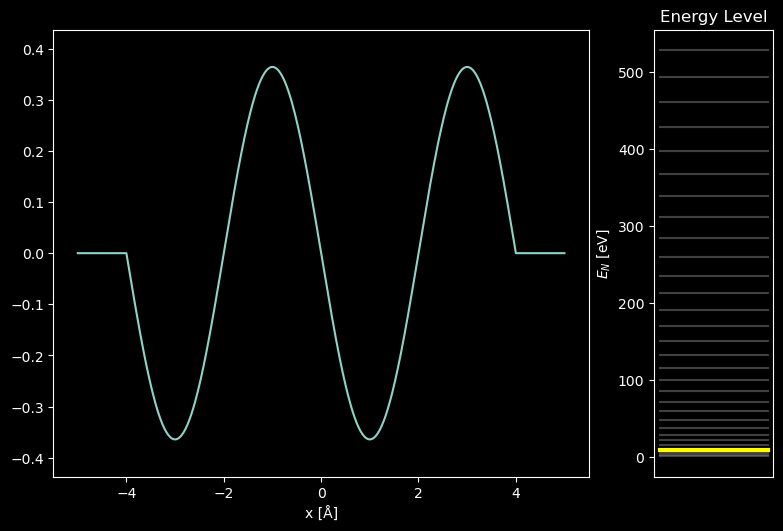

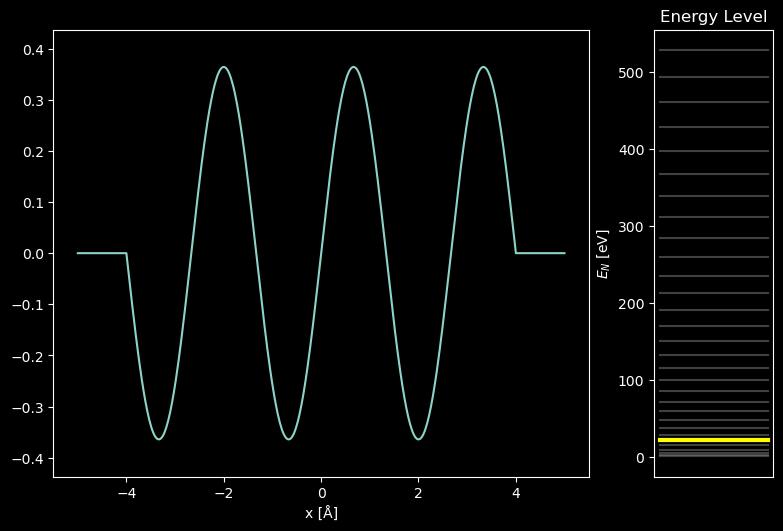

In [10]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(5)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

Problem#8: The eigenstates in the ISW will always be zero on the edge since theres an infinite potential at the boundary. In SHO, the eigenstates dont go to zero at the boundary since there isnt a boundary, they just gradually degrade to 0 as you travel to +infinity/-infinity 

Problem#9: The quantum number n is equal to the number of extrema in each eigenstate plot. If n = 5 then there will be 5 extema. 

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.03610944747924805


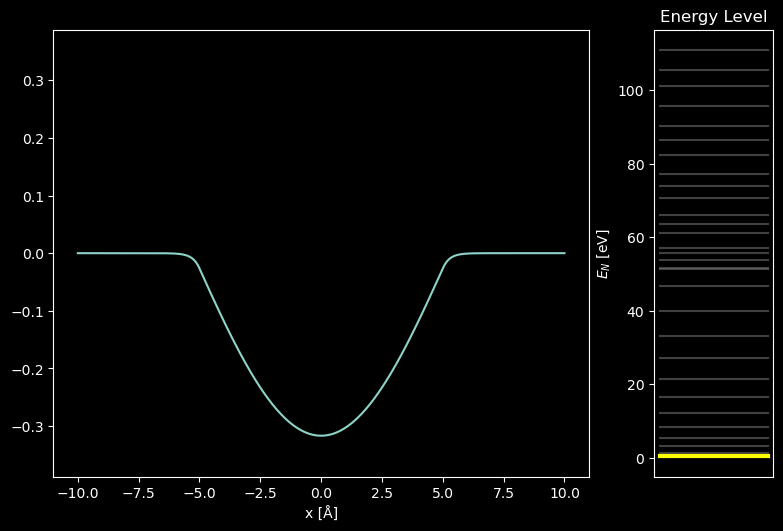

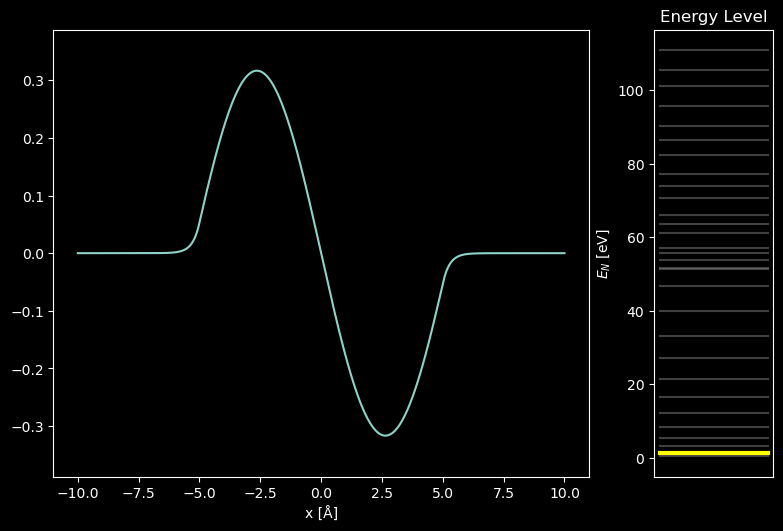

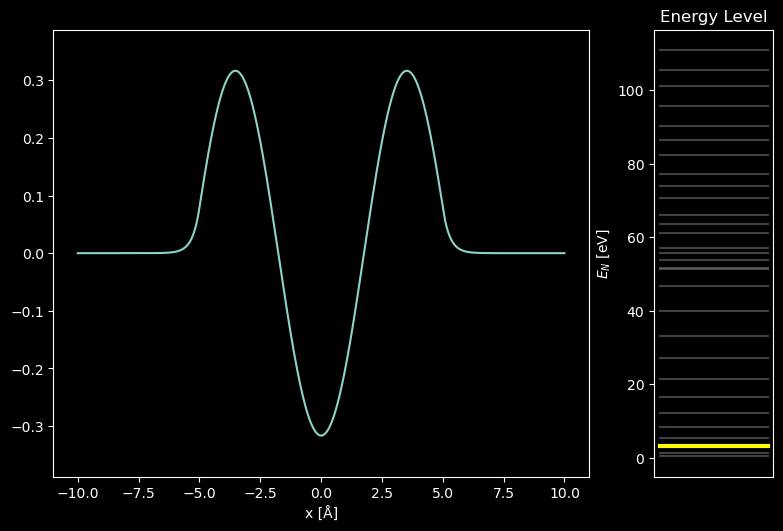

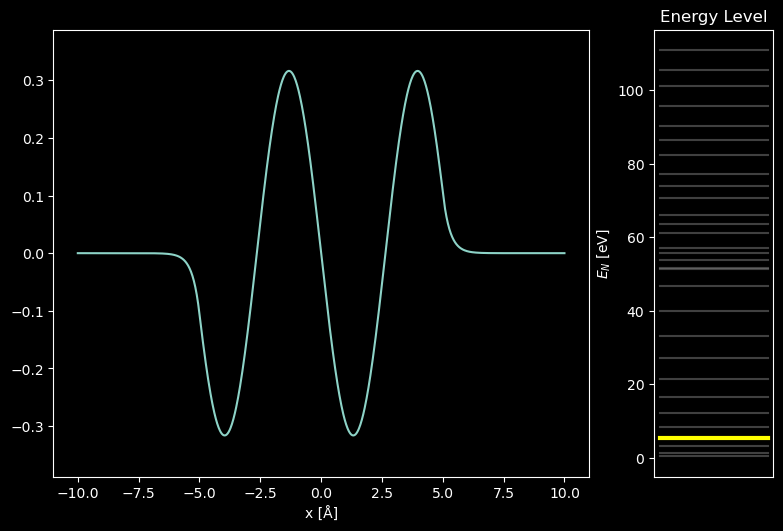

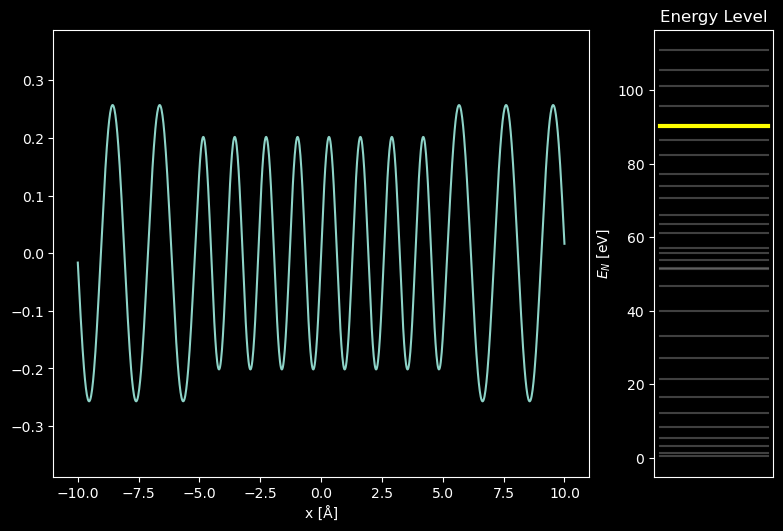

In [16]:
def finite_SW(particle):
    well_depth = 50 * eV
    well_width = 10 * Å 
    return np.where(np.abs(particle.x) < well_width / 2, 0, well_depth)

H = Hamiltonian(particles=SingleParticle(), potential=finite_SW, 
                spatial_ndim=1, N=1024, extent=20*Å)

eigenstates = H.solve(max_states=30)

visualization = init_visualization(eigenstates)

visualization.plot_eigenstate(0)
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(25)

Problem#11: No looking at the lower quantum state plots we can see they seem very restricted and when they hit that boundary we can tell that the eneergy goes to 0 but when the quantum number is large like the final graph th